## Problem Statement
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain.

### Domain Anlysis

1.	Airline: So this column will have all the types of airlines like Indigo, Jet Airways, Air India, and many more.
2.	Date_of_Journey: This column will let us know about the date on which the passenger’s journey will start.
3.	Source: This column holds the name of the place from where the passenger’s journey will start.
4.	Destination: This column holds the name of the place to where passengers wanted to travel.
5.	Route: Here we can know about what the route is through which passengers have opted to travel from his/her source to their destination.
6.	Arrival_Time: Arrival time is when the passenger will reach his/her destination.
7.	Duration: Duration is the whole period that a flight will take to complete its journey from source to destination.
8.	Total_Stops: This will let us know in how many places flights will stop there for the flight in the whole journey.
9.	Additional_Info: In this column, we will get information about food, kind of food, and other amenities.
10.	Price: Price of the flight for a complete journey including all the expenses before onboarding.

In [1]:
# imporint the required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loding the data
df = pd.read_excel('Flight_Fare.xlsx', parse_dates=['Date_of_Journey'])

In [4]:
#checking some random data in data set
df.sample(8)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
95,IndiGo,2019-06-21,Chennai,Kolkata,MAA → CCU,05:15,07:40,2h 25m,non-stop,No info,3540
3665,Multiple carriers,2019-06-01,Delhi,Cochin,DEL → BOM → COK,13:00,01:30 02 Jun,12h 30m,1 stop,No info,13377
347,Jet Airways,2019-06-12,Delhi,Cochin,DEL → IDR → BOM → COK,21:25,12:35 13 Jun,15h 10m,2 stops,In-flight meal not included,11507
3207,IndiGo,2019-05-24,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
2882,Jet Airways,2019-05-18,Kolkata,Banglore,CCU → BOM → BLR,14:05,12:00 19 May,21h 55m,1 stop,In-flight meal not included,9663
3387,Jet Airways,2019-06-24,Delhi,Cochin,DEL → BOM → COK,19:45,04:25 25 Jun,8h 40m,1 stop,In-flight meal not included,10262
5271,IndiGo,2019-05-27,Chennai,Kolkata,MAA → CCU,19:35,21:55,2h 20m,non-stop,No info,3597
6028,IndiGo,2019-06-27,Banglore,Delhi,BLR → DEL,16:55,19:55,3h,non-stop,No info,4823


In [5]:
pd.set_option('display.max_columns', None)

In [6]:
# checking last 5 data
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,2019-05-09,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


**We identify the following points when we look at the sample data.**

1. The Route column contains a list of cities which are transitional points before destination. Which we will separe them to do some Analysis.

2. The Arrival time column has months and dates attached along with time, mentioning about reaching the destination the next day of departure. which we need to separate for further insights.

3. The Duration is in a string format, we need to convert into integer type.

4. The total stops also has some text in it, we need to do some type convertion.

5. The Date of Journey column has year, month and day of the travel, extracting them could give us more information about the passanger's preferences.

In [7]:
# column names

df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [8]:
#checking desciption of the data
# since most of the data has info in string or text format, cann't find any meaningful info here.

df.describe(include='O')

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,5,6,128,222,1343,368,5,10
top,Jet Airways,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,4537,4537,2376,233,423,550,5625,8345


**from the the above description we can find the following details.**

- Here, 10683 number of observations are there, out of which 12 are unique Airlines and the top Airline
is Jet Airways, 
- It has frequested 3849 times, Means travelled 3849 times more compared to other Airlines and the most duration or highest time it has taken is 2Hours and 50 minutes.
- It's top Source and destination cities are Delhi and Cochin

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


- After checking the information like data types, how many null-values etc
- There are 10683 observations, and no null values expect for the Route and Total_stops columns
- To conlcude - all the features except for the targer column everything is object type.

In [10]:
# checking the number of observation and features
# we have 10683 observations and 11 features.

df.shape

(10683, 11)

In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

- After checking for null values, found that there are two null values in Route and Total_Stops, one null in each feature and we might impute them later.

- Now we are finding the unique values for categorical columns to understand the data better
- Helps in encoding the data to numerical.

In [12]:
categorical = ["Airline", "Source", "Destination", "Additional_Info"]

i = 1
for column in categorical:
        print(column,":", df[column].unique())
        print(f" {len(df[column].unique())} unique {column}s")
        if i < len(categorical):
            i += 1
            print("-"*90)

Airline : ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
 12 unique Airlines
------------------------------------------------------------------------------------------
Source : ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
 5 unique Sources
------------------------------------------------------------------------------------------
Destination : ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
 6 unique Destinations
------------------------------------------------------------------------------------------
Additional_Info : ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']
 10 unique Additional_Infos


## Feature Engineering

Extracting days, months and years from Date of Journey column to do more analysis on what months or days had the highest prices and dropping the column.

In [13]:
df['Date_of_Journey'].dtype

dtype('<M8[ns]')

**Extracting the Month, Year, Days from the Date_of_journey, to do more Analysis.**

In [14]:
df['Date_of_Journey'][0].year

2019

In [15]:
Journey_Month = df['Date_of_Journey'].apply(lambda x : x.month)
Journey_Year = df['Date_of_Journey'].apply(lambda x : x.year)
Journey_Date = df['Date_of_Journey'].apply(lambda x : x.day)

In [16]:
# inserting the columns into the data frame for more insights.

df.insert(2, "Journey_Month", value=Journey_Month)
df.insert(3, column='Journey_Year', value= Journey_Year)
df.insert(4, column='Journey_Date', value= Journey_Date)

In [17]:
df['Journey_Year'].value_counts()

Journey_Year
2019    10683
Name: count, dtype: int64

In [18]:
#since we have only one year, that is 2019, this would not give any information or weightage to the module, so dropping it.
df.drop('Journey_Year', axis=1, inplace=True)

In [19]:
# this gives the info about the transitional points of an Airline.

df[['Source', 'Route', 'Destination']].sample(10)

,Source,Route,Destination
7246,Kolkata,CCU → DEL → COK → BLR,Banglore
1521,Delhi,DEL → BOM → COK,Cochin
9712,Kolkata,CCU → DEL → BLR,Banglore
8704,Kolkata,CCU → BOM → COK → BLR,Banglore
9581,Delhi,DEL → IDR → BOM → COK,Cochin
2553,Kolkata,CCU → GAU → DEL → BLR,Banglore
6835,Mumbai,BOM → IDR → DEL → HYD,Hyderabad
8171,Mumbai,BOM → HYD,Hyderabad
4667,Kolkata,CCU → BOM → COK → BLR,Banglore
7547,Mumbai,BOM → HYD,Hyderabad


## Extracting features from Route column

In [20]:
df['Route'].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

In [21]:
data_route = df['Route'].str.split("→", expand=False)

In [22]:
for i in range(6):
    print("Null values for {} city is: {}".format(i+1, data_route.str[i].isnull().sum()))

Null values for 1 city is: 1
Null values for 2 city is: 1
Null values for 3 city is: 3492
Null values for 4 city is: 9117
Null values for 5 city is: 10637
Null values for 6 city is: 10682


- Since city 4 and 5 have more null values, we won't be considering to add them, because imputing these many null values might lead to misinterpretation and mislead the prediction.

- Also this may indicate that the transition points are only few rather than 4 or 5 stops.

- Abbrevations for few cities
- BLR - Bangalore
- CCU - Kolkata
- DEL - Delhi
- BOM - Bombay or Mumbai
- AMD - Ahmedabad
- COK - Cochin

In [23]:
df['Stop_City1']= data_route.str[0]
df['Stop_City2']= data_route.str[1]
df['Stop_City3']= data_route.str[2]

In [24]:
df['Stop_City2'].unique()

array([' DEL', ' IXR ', ' LKO ', ' NAG ', ' BLR', ' BOM ', ' BLR ',
       ' CCU', ' AMD ', ' PNQ ', ' CCU ', ' COK ', ' IDR ', ' GAU ',
       ' MAA ', ' HYD ', ' COK', ' DEL ', ' HYD', ' BHO ', ' JAI ',
       ' ATQ ', ' JDH ', ' BBI ', ' GOI ', ' BDQ ', ' TRV ', ' IXU ',
       ' IXB ', ' UDR ', ' RPR ', ' DED ', ' VGA ', ' VNS ', ' IXC ',
       ' PAT ', ' JLR ', ' KNU ', ' GWL ', ' VTZ ', ' NDC ', ' IXZ ',
       ' HBX ', ' IXA ', ' STV ', nan], dtype=object)

## Extract features from Arrival_Time

In [25]:
df['Arrival_Time']

0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
10678           22:25
10679           23:20
10680           11:20
10681           14:10
10682           19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [26]:
# we will only be considering hours and minutes from this column.

df['Time_of_arrival'] = df['Arrival_Time'].str.split(" ")

In [27]:
# we are converting the time in hours to minutes so we can analyse the data better.

df['Arrival_Time'] = df['Time_of_arrival'].str[0].str.split(":").str[0].astype("int64")*60 + df['Time_of_arrival'].str[0].str.split(":").str[1].astype("int64")


In [28]:
df['Arrival_Time']

0          70
1         795
2         265
3        1410
4        1295
         ... 
10678    1345
10679    1400
10680     680
10681     850
10682    1155
Name: Arrival_Time, Length: 10683, dtype: int64

In [29]:
#splitting the duration column into hours and minutes, so we can extract and convert to total minutes
df['Duration'] = df['Duration'].str.split(' ')

In [30]:
# since there was a mistake in the data, the minutes has to be a hour, so replaced 'm' with 'h'
df[df['Duration'].str[0].str.split('h').str[0] == '5m']
df.loc[6474, 'Duration'] = '5'

# since there are null values in the data, we can't directly convert the datatype and convert hours to minutes.
# we are adding extracted features to data and handle null values.

df['duration_hours'] = df['Duration'].str[0].str.split('h').str[0]
# df['Travel_hours'] = df['Travel_hours'].str[0]
df['duration_minutes'] = df['Duration'].str[1].str.split('m').str[0]
# df['Travel_minutes'] = df['Travel_minutes'].str[0]

In [31]:
# checking for the null values in the duration column.
df['duration_hours'].isnull().sum()
df['duration_minutes'].isnull().sum()

1032

In [32]:
# extracting hours and minutes, converting into int data type and converting hours to minutes and adding it.
df['Departure_Time'] = df['Dep_Time'].str.split(":").str[0].astype('int64')*60 + df['Dep_Time'].str.split(":").str[1].astype('int64')


In [33]:
# Since we have extracted the data from Route and Arrival Time, dropping those columns.
df.columns
# deleting Date_of_Journey, Dep_Time, Route, Duration, Time_of_arrival
df.drop(['Date_of_Journey', 'Dep_Time', 'Route', 'Duration', 'Time_of_arrival'], axis=1, inplace=True)

In [34]:
# checking the unique values in the total_stops, so we can encode the values.

df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [35]:
# converting the categorical to numerical values.

df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}, inplace=True)

In [36]:
# replacing the nan value to zero, since there was only one missing value. And converting data type to int, as it's in float

df['Total_Stops'].replace(np.nan, 0, inplace=True)
df['Total_Stops'] = df['Total_Stops'].astype('int64')

In [37]:
df.head(4)

,Airline,Journey_Month,Journey_Date,Source,Destination,Arrival_Time,Total_Stops,Additional_Info,Price,Stop_City1,Stop_City2,Stop_City3,duration_hours,duration_minutes,Departure_Time
0,IndiGo,3,24,Banglore,New Delhi,70,0,No info,3897,BLR,DEL,NaN,2,50,1340
1,Air India,5,1,Kolkata,Banglore,795,2,No info,7662,CCU,IXR,BBI,7,25,350
2,Jet Airways,6,9,Delhi,Cochin,265,2,No info,13882,DEL,LKO,BOM,19,NaN,565
3,IndiGo,5,12,Kolkata,Banglore,1410,1,No info,6218,CCU,NAG,BLR,5,25,1085


In [38]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [39]:
# since there are only 4 business class information and other details might not give any weightage to the data.
# and seems doesn't affect in prdeicting the prices, So dropping the column.
# out of 10832 8300 belong to no-info category, that is not giving any information about the flight or prices.


df['Additional_Info'].value_counts()

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [40]:
df.drop('Additional_Info', axis=1, inplace=True)

In [41]:
df.isnull().sum()

Airline                0
Journey_Month          0
Journey_Date           0
Source                 0
Destination            0
Arrival_Time           0
Total_Stops            0
Price                  0
Stop_City1             1
Stop_City2             1
Stop_City3          3492
duration_hours         0
duration_minutes    1032
Departure_Time         0
dtype: int64

In [42]:
# since the cities have white spaces, we strippping them out.

df['Stop_City1'] = df['Stop_City1'].str.strip()
df['Stop_City2'] = df['Stop_City2'].str.strip()
df['Stop_City3'] = df['Stop_City3'].str.strip()

In [43]:
df['Stop_City3'].unique()
df['Stop_City2'].unique()
df['Stop_City1'].unique()

array(['BLR', 'CCU', 'DEL', 'MAA', 'BOM', nan], dtype=object)

In [44]:
# since the city1 and so on have null values since the airline didn't have any stops, so we are imputing with the destination.
#  Destination - Cochin, So the Stops taking the both source and destination in the route column when we split the data
# city1 will have source and city2 and 3 will have layover cities and destination data.

# Here since the city1 and 2 have null vlaues, imputing them with source and destination cities.
df[df['Stop_City1'].isnull()]
df[df['Stop_City2'].isnull()]

,Airline,Journey_Month,Journey_Date,Source,Destination,Arrival_Time,Total_Stops,Price,Stop_City1,Stop_City2,Stop_City3,duration_hours,duration_minutes,Departure_Time
9039,Air India,5,6,Delhi,Cochin,565,0,7480,NaN,NaN,NaN,23,40,585


In [45]:
df.loc[9039, 'Stop_City1'] = 'Delhi'
df.loc[9039,'Stop_City2'] = 'Cochin'

In [46]:
df[df['Stop_City2'].isnull()]

,Airline,Journey_Month,Journey_Date,Source,Destination,Arrival_Time,Total_Stops,Price,Stop_City1,Stop_City2,Stop_City3,duration_hours,duration_minutes,Departure_Time


In [49]:
# here total_stops is 0, that means there was no layover during the trip, so city3 will not have any city
# informaton, so not going to impute with anything, doing so might lead to wrong analysis of the data.
# instead I am going to retain the Nan's and replace them with NaN, this would be easier to do some analysis, 
# rather just having null values, so we will know there were no stops for the particular fight.


# for travel minutes - there are around 1000 missing values, we are not going to impute them either, becuase ther were no minutes only hours
# available for the flights, like exact hours, not minutes. Instead we replace null values with 0 for travel minutes.


In [47]:
# df.loc[np.where(df['Stop_City3'].isnull()), 'Stop_City3']
df['Stop_City3'].replace(to_replace=np.nan, value='NaN', inplace=True)

In [48]:
df['duration_minutes'].isnull().sum()
df['duration_minutes'].replace(to_replace=np.nan, value='0', inplace=True)

df[df['duration_hours'].isnull()]
df['duration_hours'].replace(to_replace=np.nan,inplace= True)

## Data type conversion

In [49]:
df.dtypes

Airline             object
Journey_Month        int64
Journey_Date         int64
Source              object
Destination         object
Arrival_Time         int64
Total_Stops          int64
Price                int64
Stop_City1          object
Stop_City2          object
Stop_City3          object
duration_hours      object
duration_minutes    object
Departure_Time       int64
dtype: object

In [50]:
pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

In [51]:
df['duration_hours'] = df['duration_hours'].astype('int64')
df['duration_minutes'] = df['duration_minutes'].astype('int64')

In [52]:
df['Duration'] = df['duration_hours']*60 + df['duration_minutes']

In [53]:
df.columns

Index(['Airline', 'Journey_Month', 'Journey_Date', 'Source', 'Destination',
       'Arrival_Time', 'Total_Stops', 'Price', 'Stop_City1', 'Stop_City2',
       'Stop_City3', 'duration_hours', 'duration_minutes', 'Departure_Time',
       'Duration'],
      dtype='object')

In [54]:
df.drop(['duration_hours', 'duration_minutes'], axis = 1, inplace=True)

In [55]:
# df.columns
categorical = []
numerical = []
for column in df.columns:
    if df[column].dtypes == 'int64':
        numerical.append(column)
    elif df[column].dtypes == 'object':
        categorical.append(column)

print(categorical)
print(numerical)

['Airline', 'Source', 'Destination', 'Stop_City1', 'Stop_City2', 'Stop_City3']
['Journey_Month', 'Journey_Date', 'Arrival_Time', 'Total_Stops', 'Price', 'Departure_Time', 'Duration']


## Let's do some analysis

## Task 1:-Prepare a complete data analysis report on the given data.

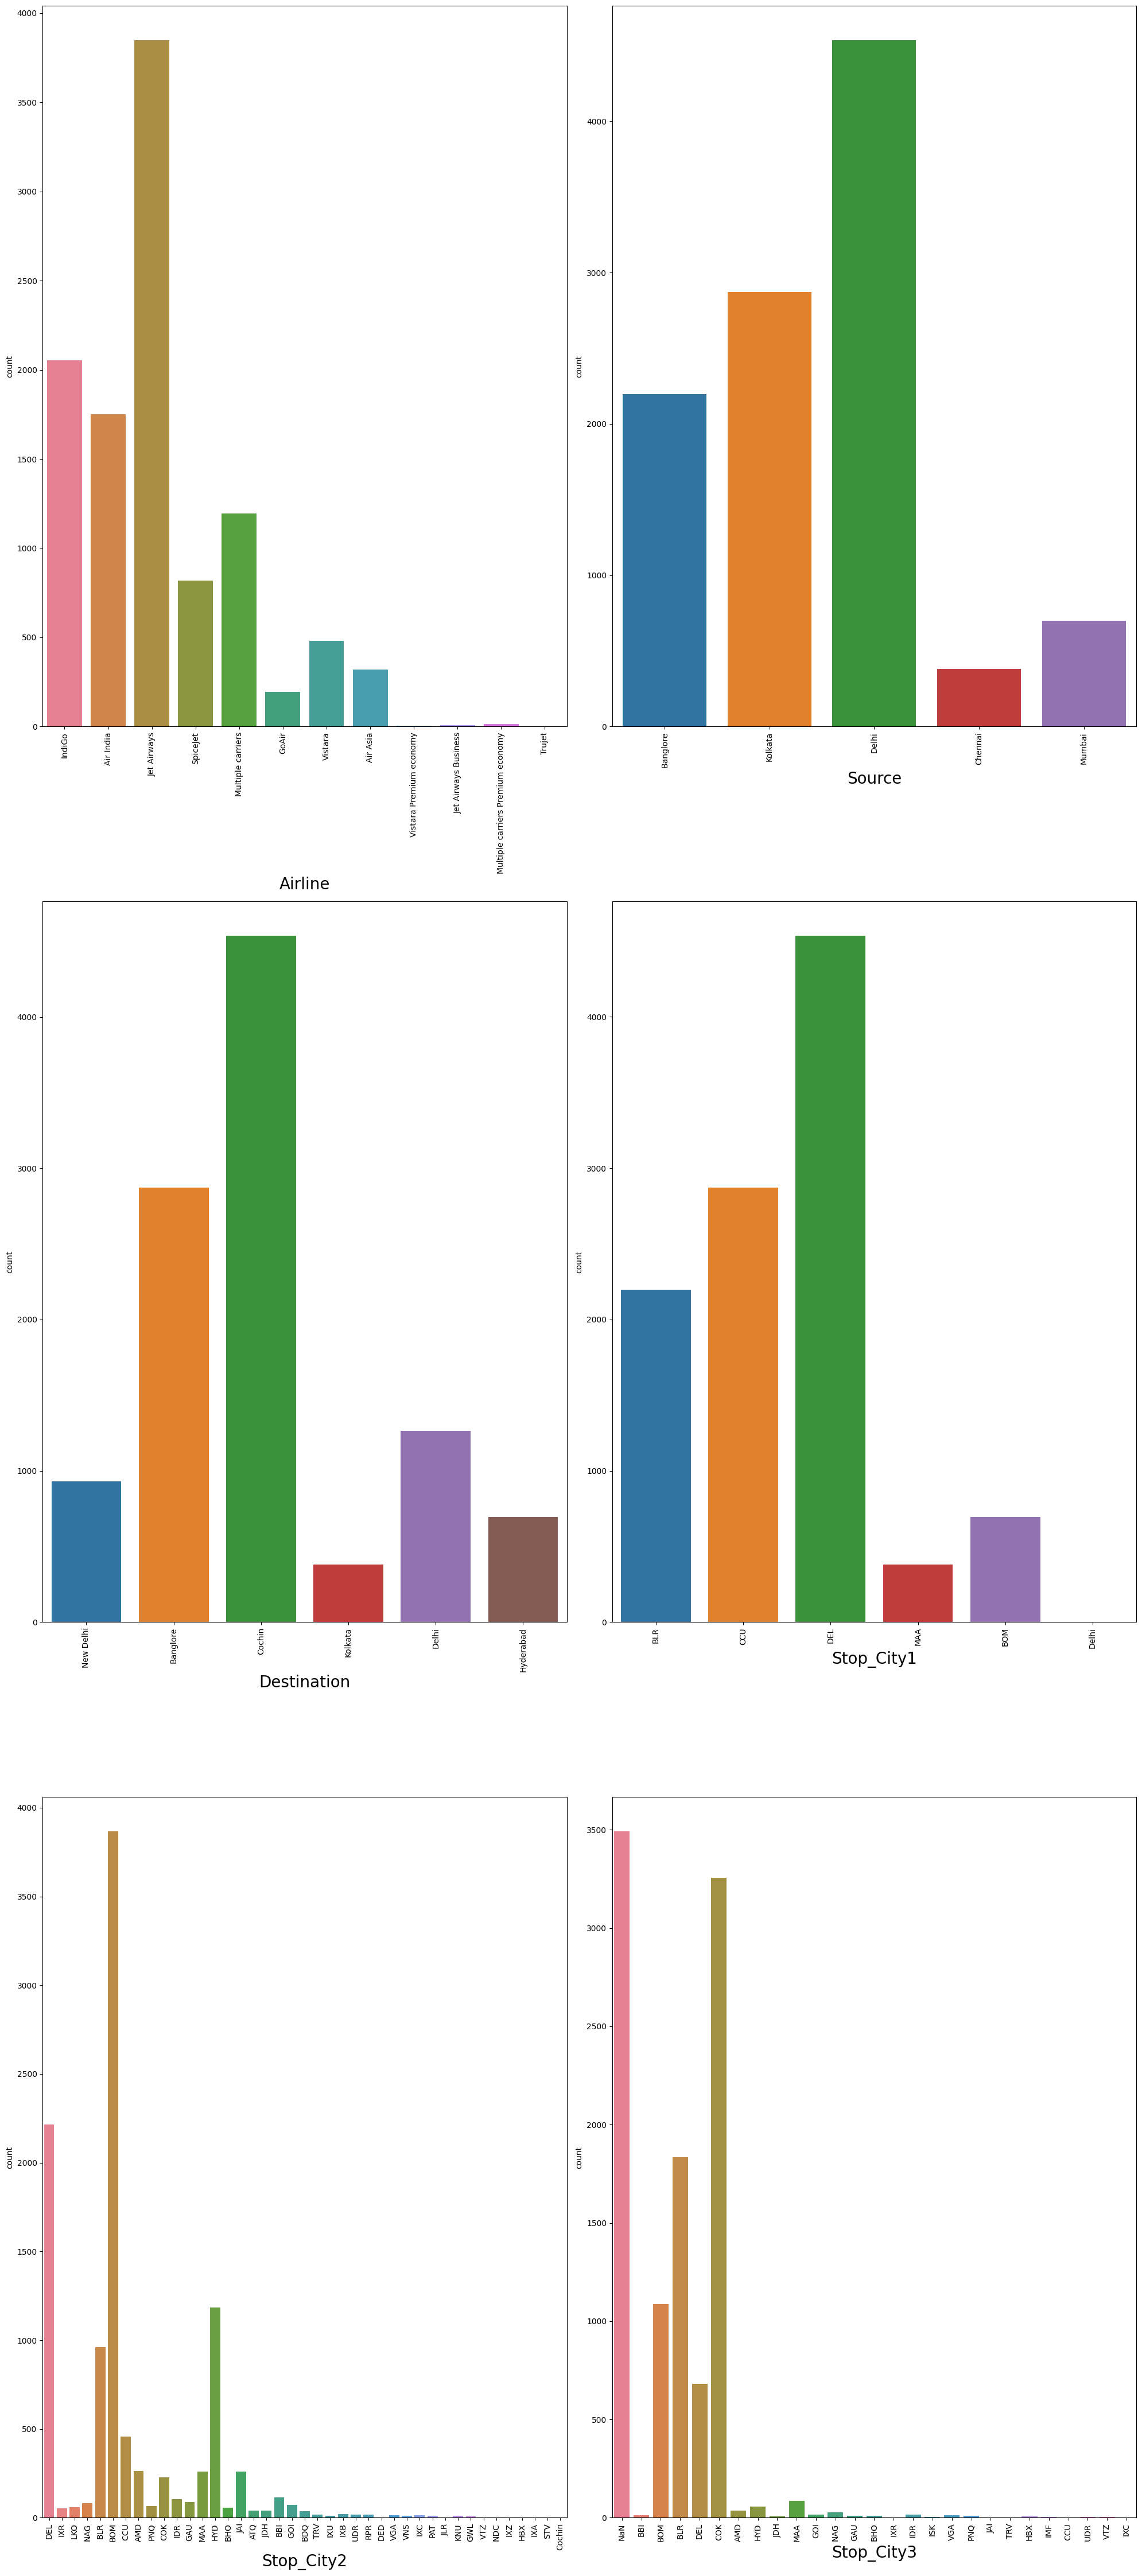

In [56]:
plt.figure(figsize=(20,45))
plot_number = 1

for i in categorical:
    plt.subplot(3, 2, plot_number)
    sns.countplot(x = df[i], hue=df[i])
    plt.xticks(rotation = 90)
    plt.xlabel(i, fontsize = 20)
    # plt.yticks(rotation = 45)
    plt.tight_layout()
    plot_number += 1
plt.show()

**We make the below mentioned observations using the plots above –**

1. **Airlines** 

- Jet Airways is the most preferred airline with the highest row count, followed by Indigo and AirIndia.
- Count for Vistara Premium economy, Trujet, Multiple carries premium economy and Jet airways business is quite low.

2. **Source**

- Majority of the flights take off from Delhi
- Chennai has the minimum count of flight take-offs

3. **Destination**

- Maximum flights land in Cochin
- Kolkata has the lowest count of receiving the flights


4. **Stop_City1**

- Delhi, Kolkata and Banglaore are the major cities have more transitional points for the Airlines before reaching the destination.

5. **Stop_City2**

- Bombay, Delhi and Hyderabad are the cities have highest transitional points in ranks 1, 2, and 3.

6. **Stop_City3**

- Cochine has the highest 3rd stops for the airlines.
- Banglore has the 2nd highest in stops.gh of the place being Cochin.

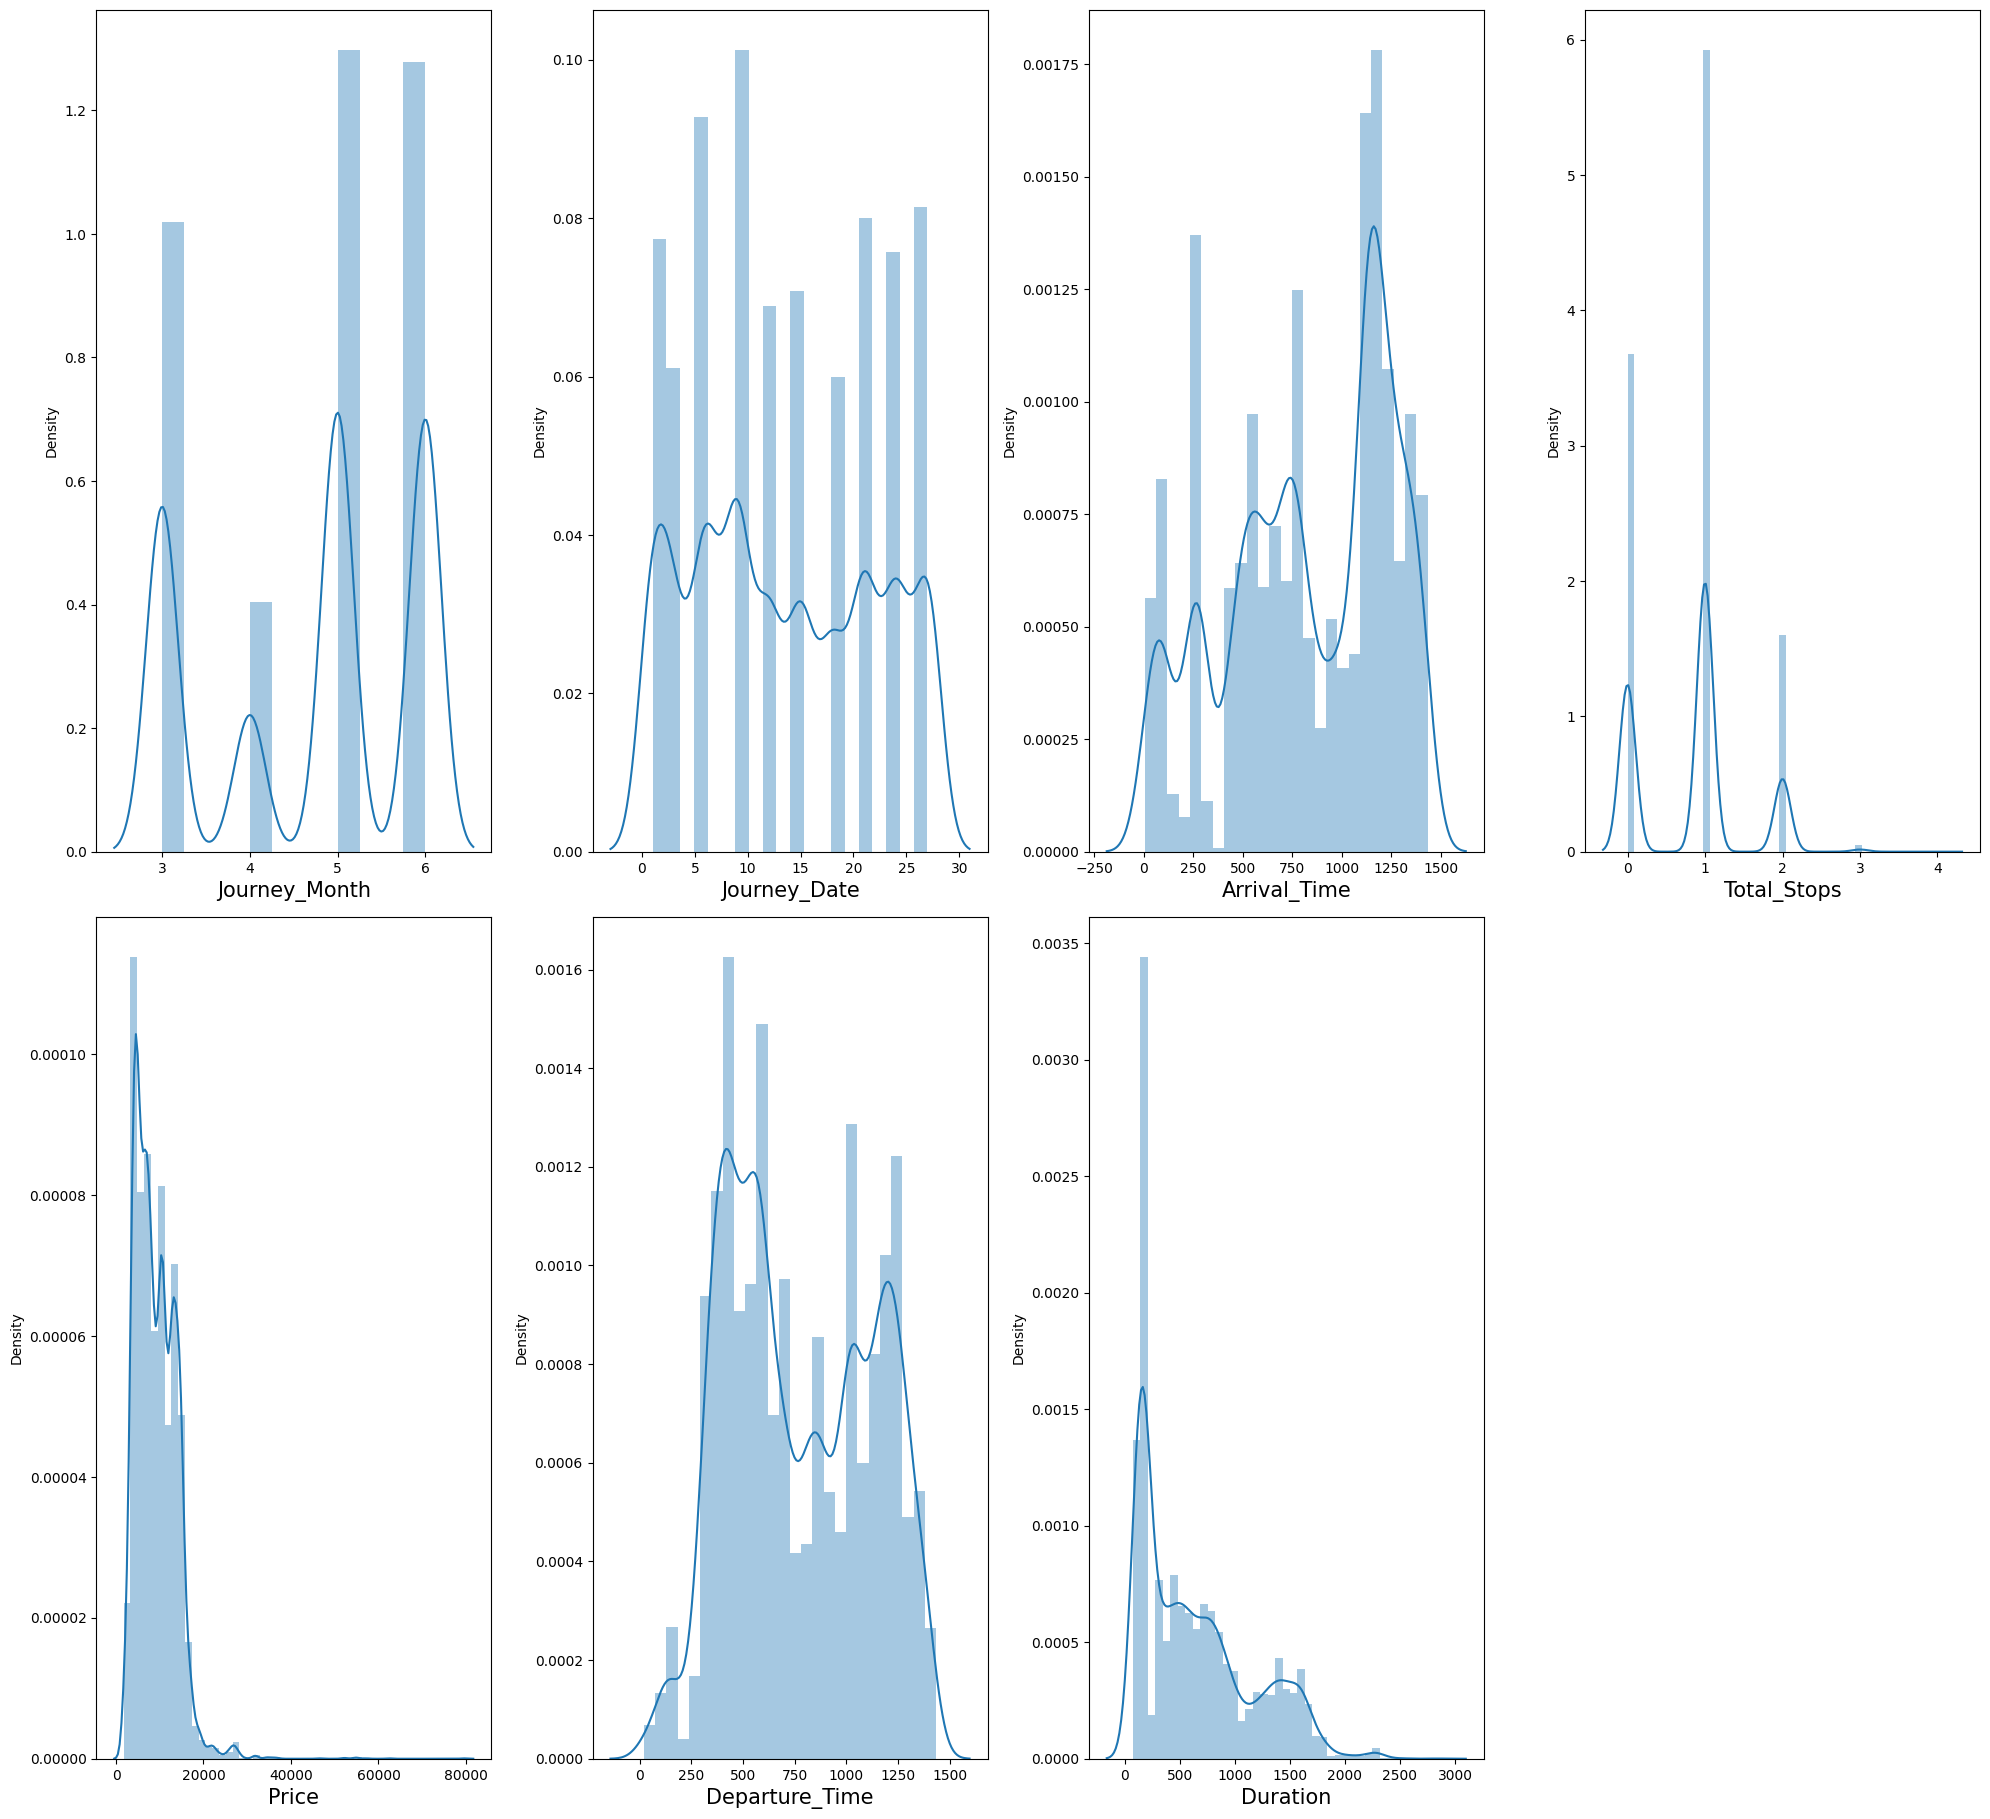

In [57]:
plt.figure(figsize=(20,45))
plot_number = 1

for i in numerical:
    plt.subplot(5, 4, plot_number)
    sns.distplot(x = df[i])
    # plt.xticks(rotation = 90)
    plt.xlabel(i, fontsize = 15)
    # plt.yticks(rotation = 45)
    plt.tight_layout()
    plot_number += 1
plt.show()

**We make the below observations from the numerical data –**

**Total stops**

Majority of the flights have stops as 1, flights with 3 and 4 stops are quite low

**Date**

There are no specific dates when the flights travel; the distribution is almost similar for all dates

**Month**

People tend to travel less in April

- Flights in May and June have a higher count, seems like people travel during holiday months

**Year**

This column has only 2019 as a value and can be dropped

**​Departure_Time**

Majority of the flights tend to fly in the early morning time
Count of flights taking off during 16:00 - 23:00 is also high, Afternoon flights are less in number.

**​Arrival date**

In majority of the cases, flights take off and land on the same day

**​Arrival Time**

Majority of the flights reach its destination in the evening time around 18:00-19:00
This seems to be because majority of the flights have take-off times in the morning and hence land after in the evening

**Travel Time**

Majority of the flights have travel time for around 2-3 hours, which seems ok since these are domestic flights
Some flights have time around 30 hours too, this could be because of the number of stops in between

<Axes: xlabel='Price', ylabel='Density'>

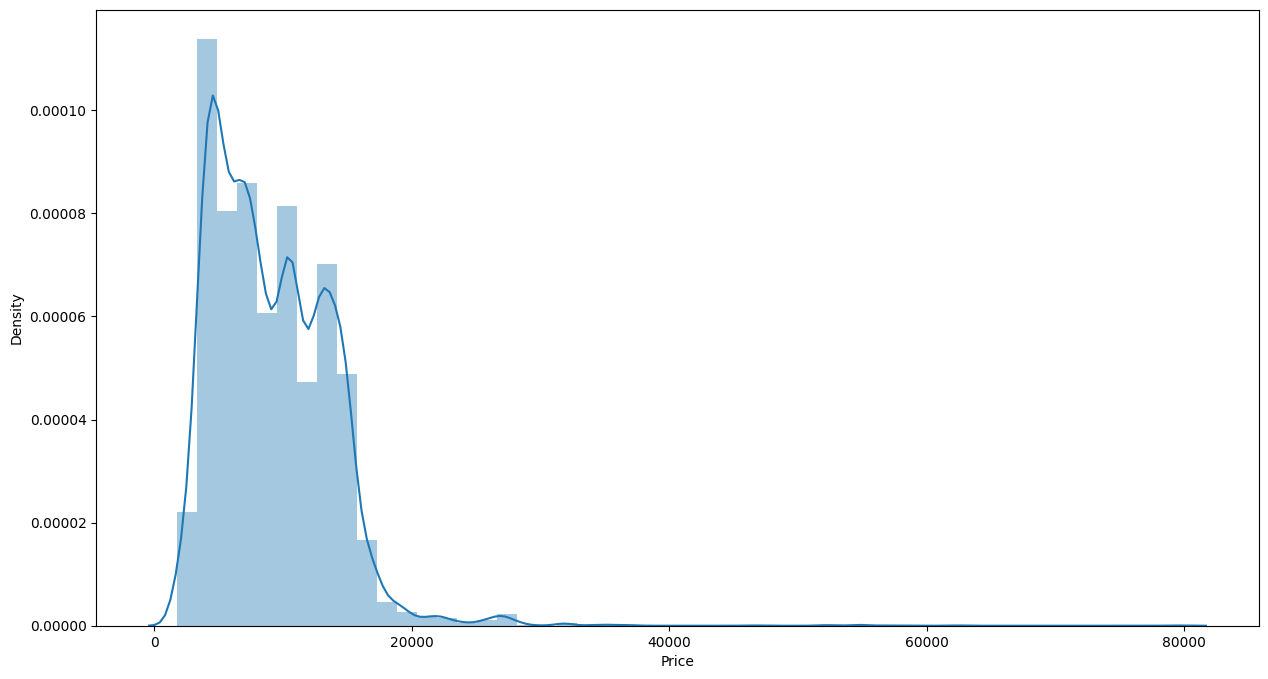

In [58]:
# checking the distribution of the target variable, price

plt.figure(figsize=(15, 8))
sns.distplot(df['Price'])

In [59]:
df['Price'].min(), df['Price'].max()

(1759, 79512)

In [60]:
# finding the range of the distribution - prices are between 1759 to 79512
range = df['Price'].max() - df['Price'].min()
range

77753

Checking the correaltion between the independent and dependent varibales

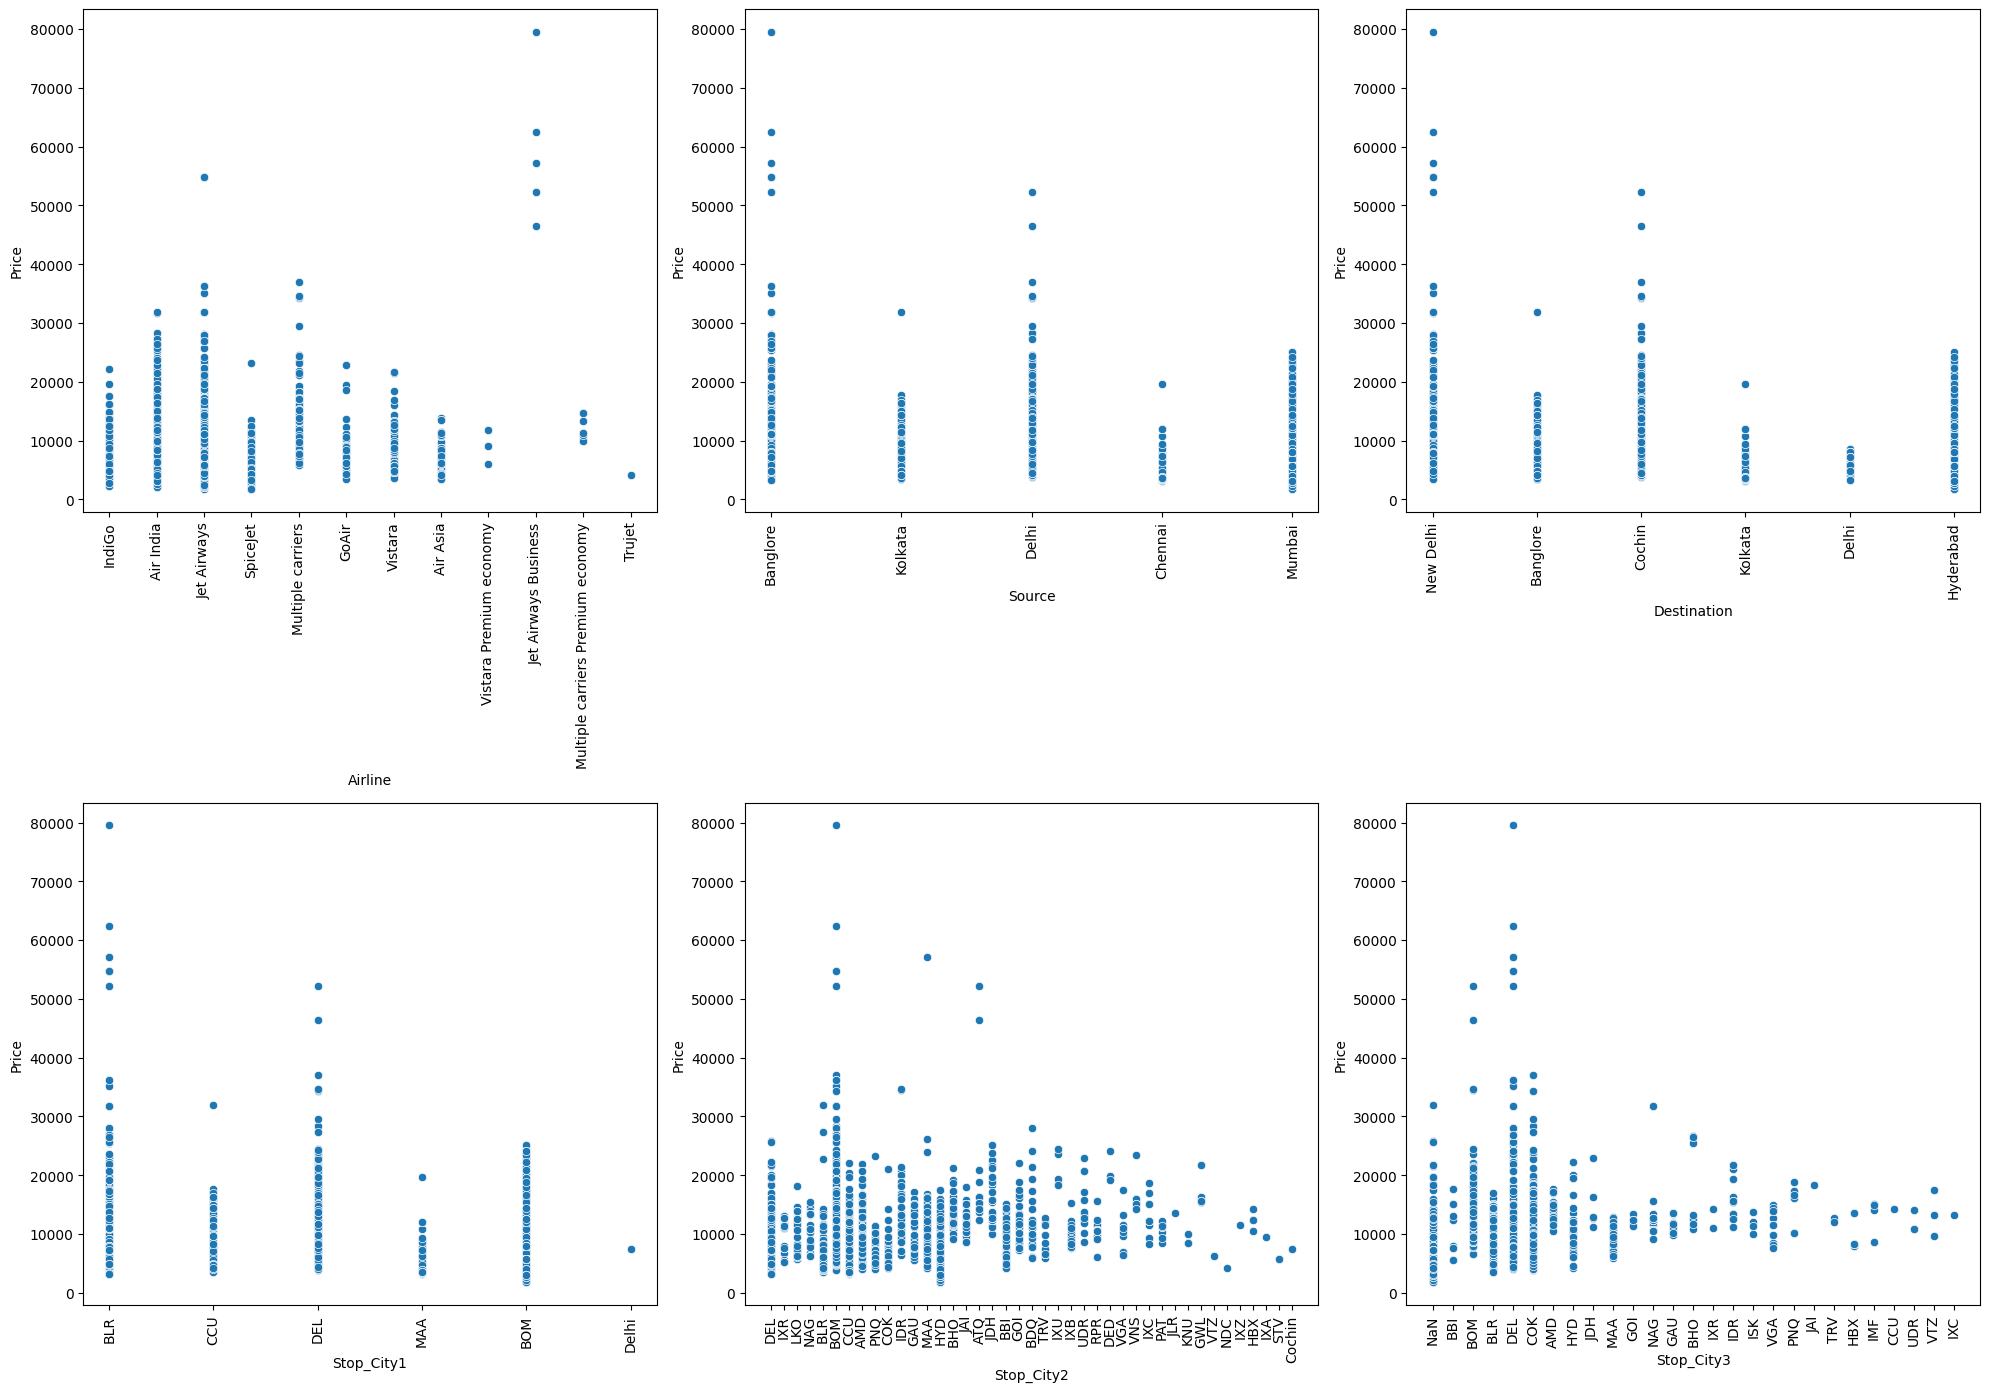

In [61]:
c = 1
plt.figure(figsize=(20, 45))

for i in categorical:
    plt.subplot(6, 3, c)
    sns.scatterplot(x = df[i], y = df['Price'])
    plt.xticks(rotation = 90)
    plt.tight_layout()
    c += 1
plt.show()

We make the following observations –

- Jet airways business class has the highest prices between 50k — 80k

- All the high cost flights depart from bangalore, rest of the flights have prices between 3k — 50k

- All high cost flights have destination as Delhi, rest of the flights have prices between 3k — 50k

- If a flight is of business class, its price would be high

- The flights with high prices having 1 stop, have stop in Bombay

- Flights with 2 stops, having higher prices, have stop in Delhi.

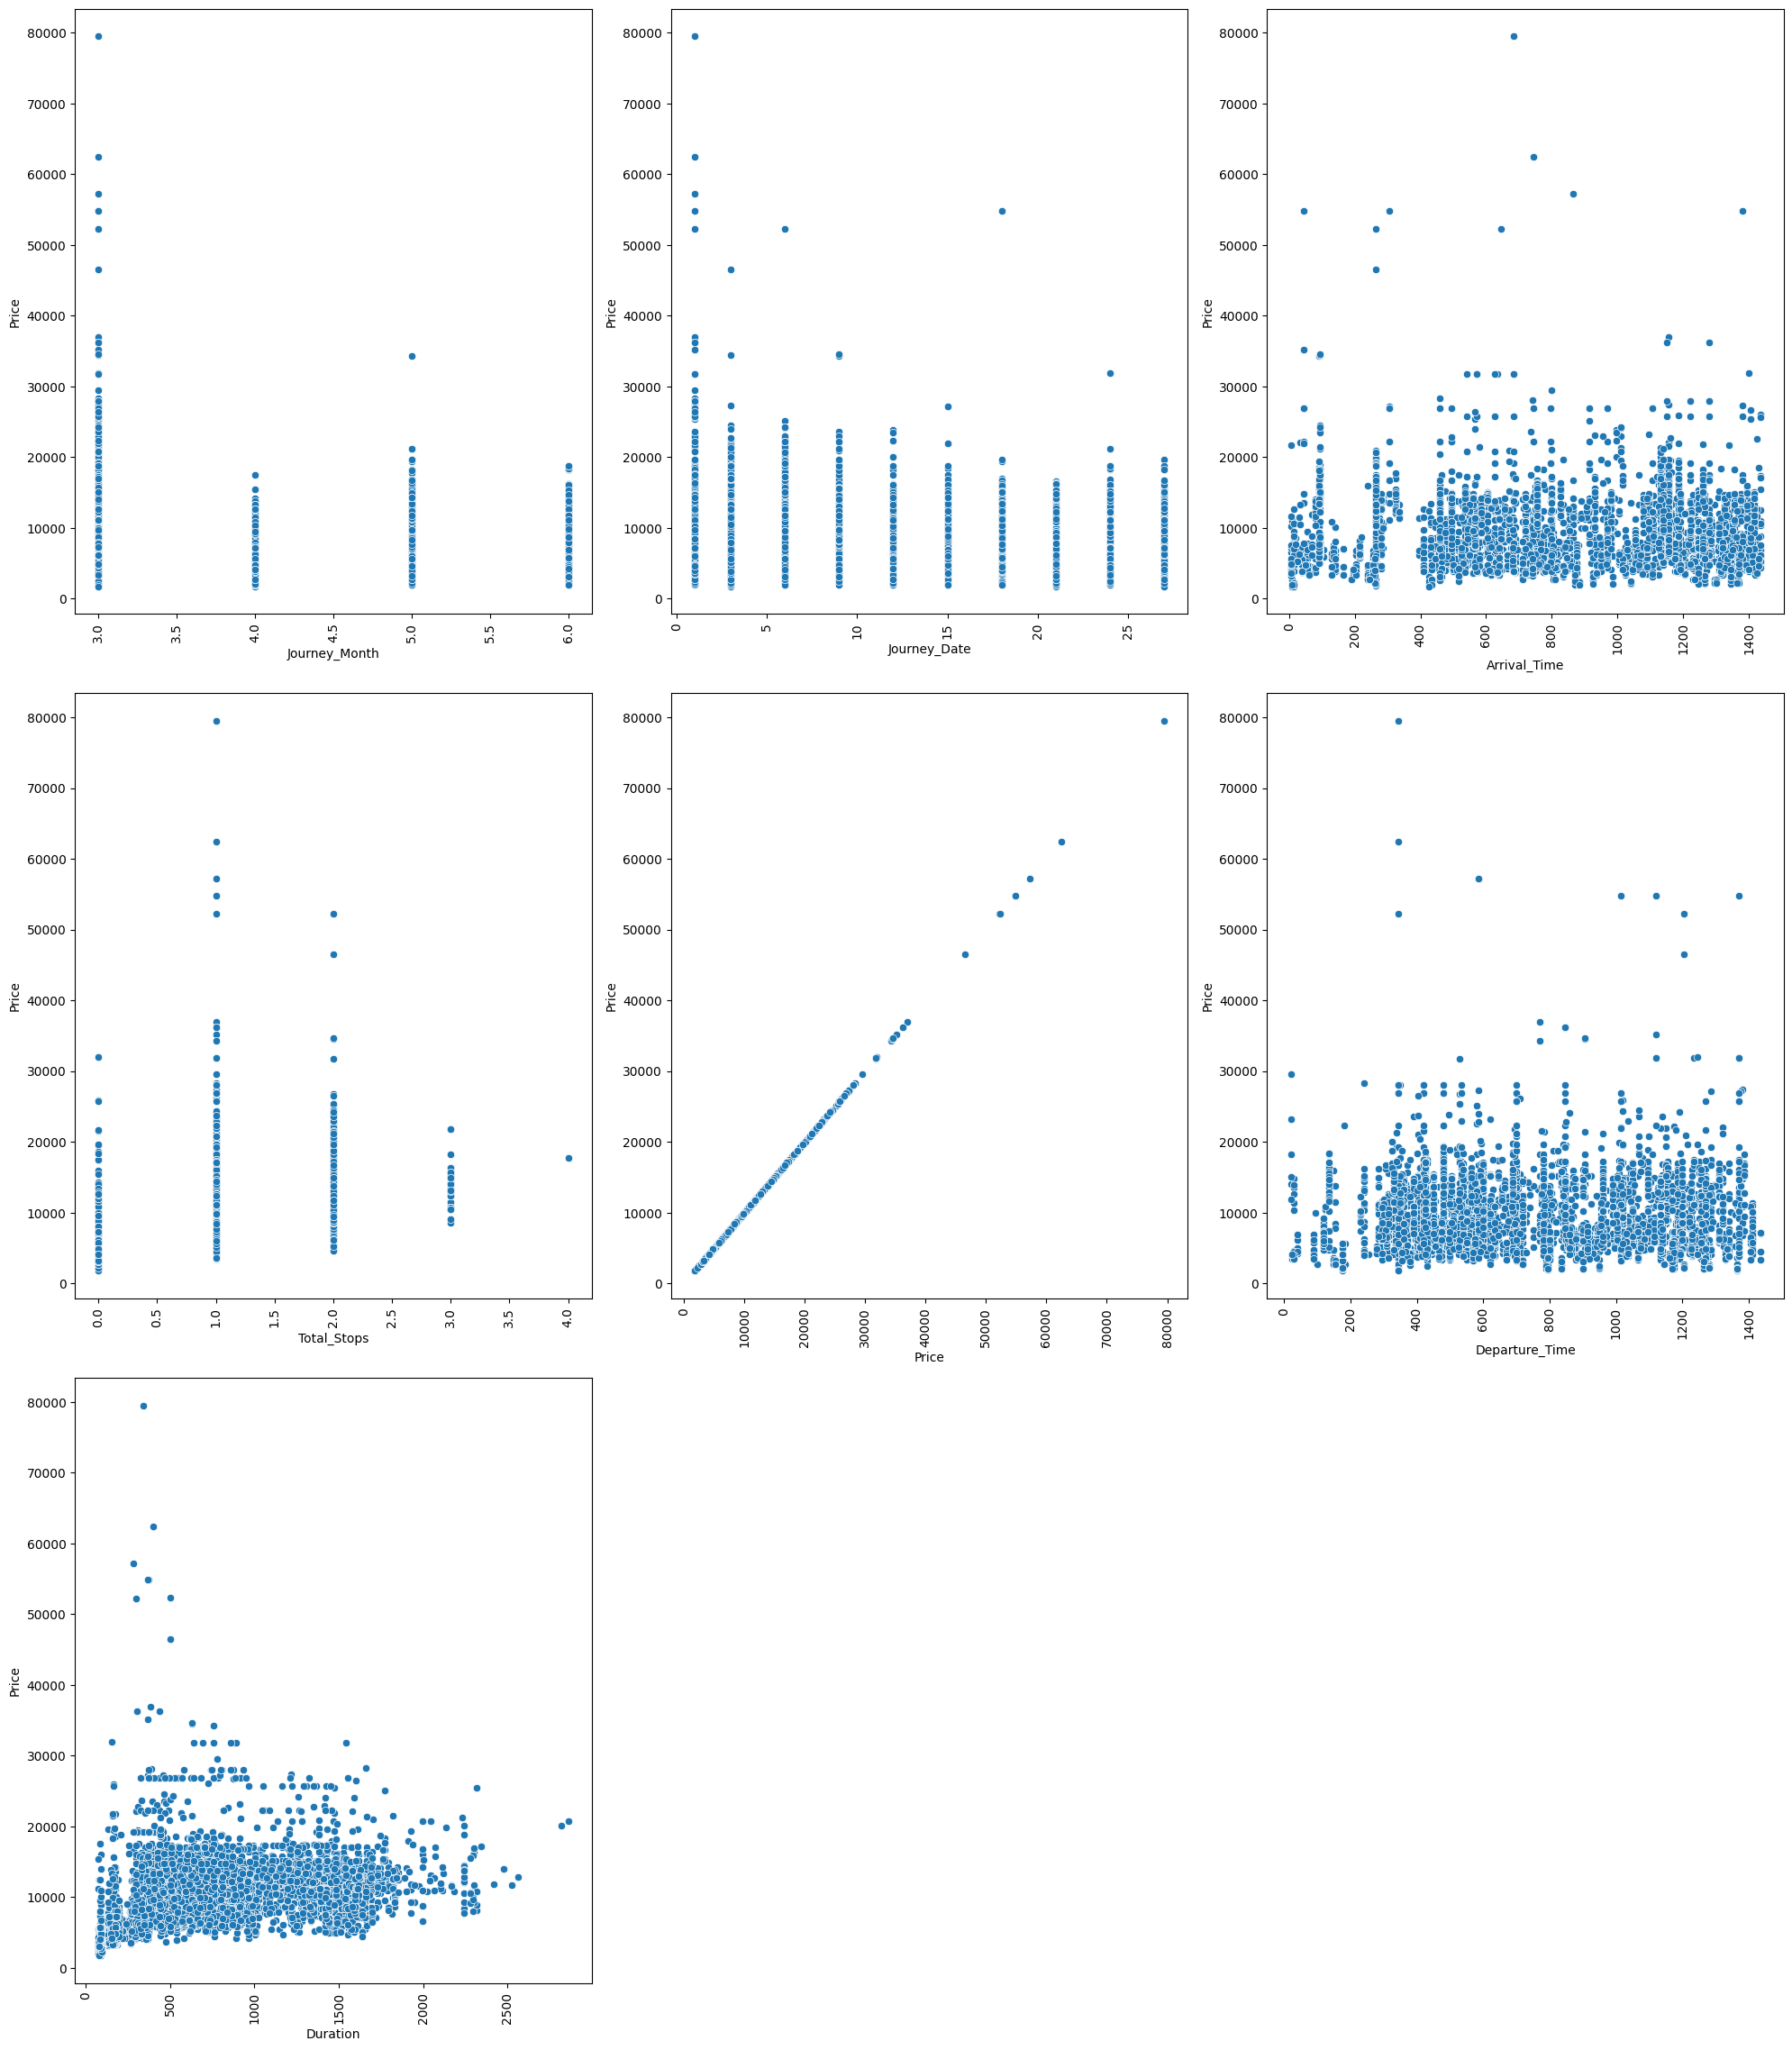

In [62]:
plotnumber = 1
plt.figure(figsize=(20, 45))

for i in numerical:
    plt.subplot(6, 3, plotnumber)
    sns.scatterplot(x = df[i], y = df['Price'])
    plt.xticks(rotation = 90)
    plt.tight_layout()
    plotnumber += 1
plt.show()

**We observe that –**

- As number of stops increase, the price range gets decreasing into a smaller price window (10k — 22k)

- High price flights are lesser during end of month

- Prices are higher in the month of March

- With increase in travel time, price increases, but the number of flights decreas.

Also we are dropping the year column which is not giving any weighted to the data or the model.

## Outlier Detection

In [63]:
len(numerical)

7

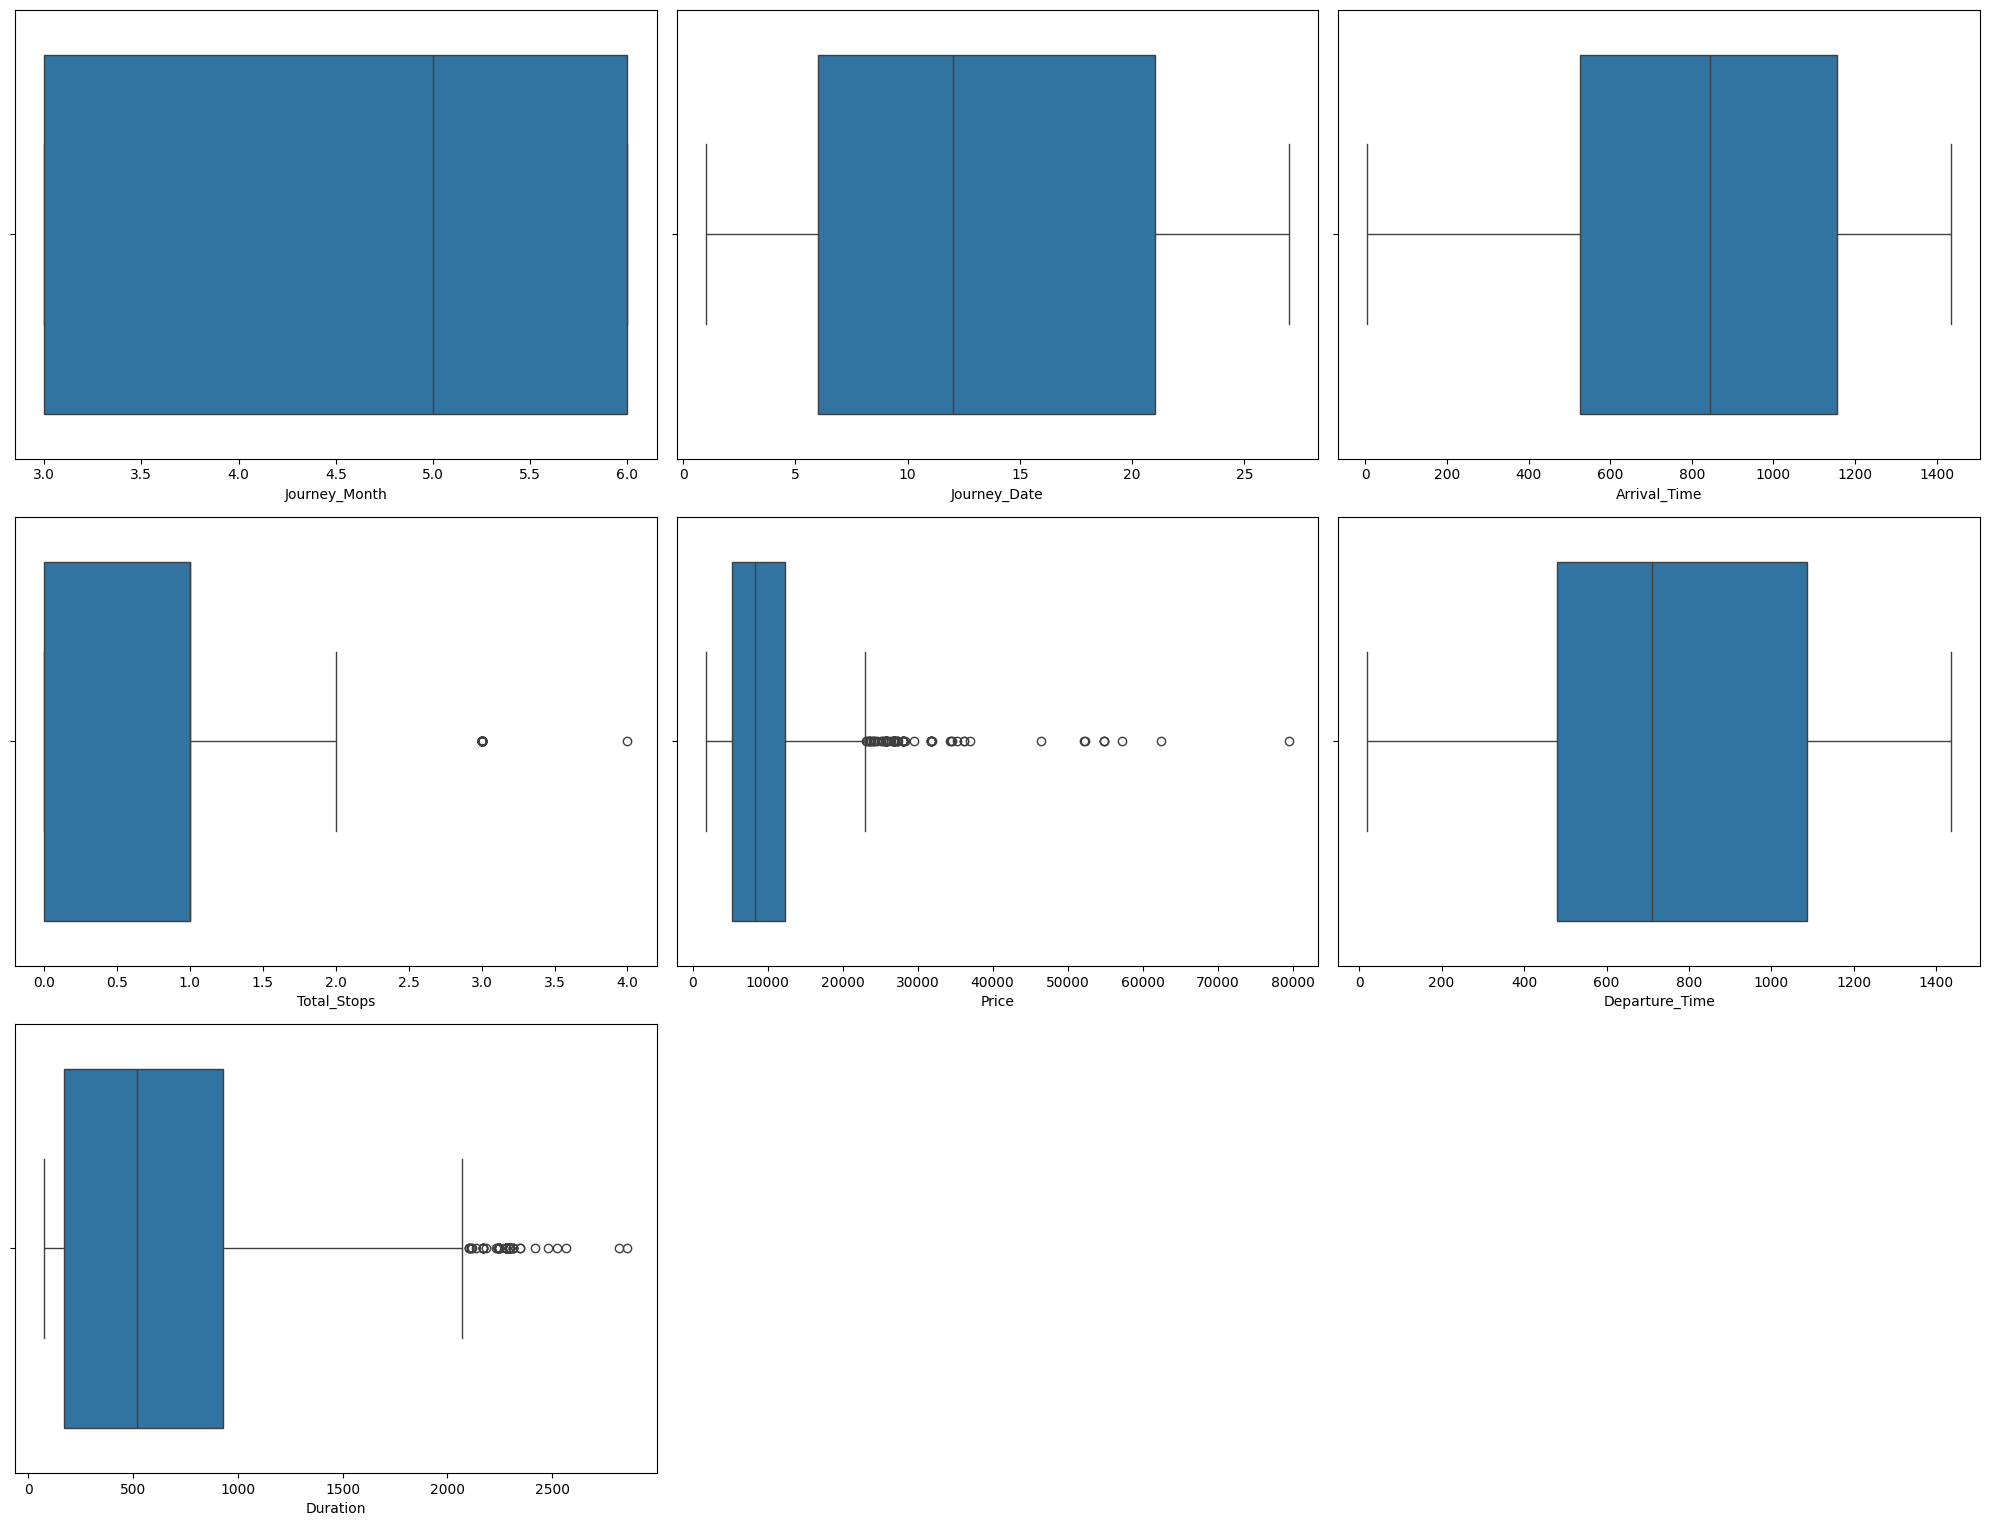

In [64]:
p = 1
plt.figure(figsize=(20, 20))
for i in numerical:
    plt.subplot(4, 3, p)
    sns.boxplot(df[i], orient='h')
    plt.tight_layout()
    p += 1
plt.show()

We have outliers in travel hours, it directly proportional or correlated to the price, as hours increases, the price increases
So we are not imputing the outliers.

In [65]:
#finding outlier using Z-score
from scipy import stats

z_scores = stats.zscore(df['Duration'])
threshold = 3
upper_limit = np.abs(z_scores) > 3
lower_limit = np.abs(z_scores) < 3

In [66]:
df[df['Duration'] == upper_limit]
df[df['Duration'] == lower_limit]

,Airline,Journey_Month,Journey_Date,Source,Destination,Arrival_Time,Total_Stops,Price,Stop_City1,Stop_City2,Stop_City3,Departure_Time,Duration


In [67]:
df[numerical].skew()

Journey_Month    -0.387493
Journey_Date      0.118351
Arrival_Time     -0.371280
Total_Stops       0.317230
Price             1.812552
Departure_Time    0.125184
Duration          0.861203
dtype: float64

<Axes: xlabel='Duration', ylabel='Count'>

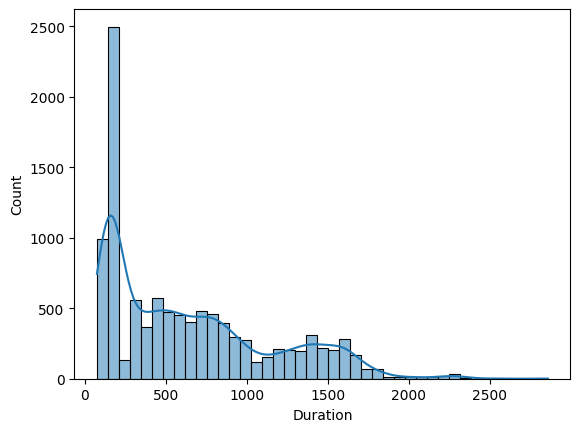

In [68]:
sns.histplot(df['Duration'], kde=True)

In [69]:
df['Duration'] = np.log(df['Duration'])

## Encoding the Categorical Data

In [70]:
df['Stop_City1'].value_counts()

Stop_City1
DEL      4536
CCU      2871
BLR      2197
BOM       697
MAA       381
Delhi       1
Name: count, dtype: int64

In [71]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [72]:
df['Stop_City3'].unique()

array(['NaN', 'BBI', 'BOM', 'BLR', 'DEL', 'COK', 'AMD', 'HYD', 'JDH',
       'MAA', 'GOI', 'NAG', 'GAU', 'BHO', 'IXR', 'IDR', 'ISK', 'VGA',
       'PNQ', 'JAI', 'TRV', 'HBX', 'IMF', 'CCU', 'UDR', 'VTZ', 'IXC'],
      dtype=object)

In [73]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(i)
        df[i] = encoder.fit_transform(df[i])

Airline
Source
Destination
Stop_City1
Stop_City2
Stop_City3


In [74]:
df.dtypes

Airline             int32
Journey_Month       int64
Journey_Date        int64
Source              int32
Destination         int32
Arrival_Time        int64
Total_Stops         int64
Price               int64
Stop_City1          int32
Stop_City2          int32
Stop_City3          int32
Departure_Time      int64
Duration          float64
dtype: object

In [75]:
df.sample(10)

,Airline,Journey_Month,Journey_Date,Source,Destination,Arrival_Time,Total_Stops,Price,Stop_City1,Stop_City2,Stop_City3,Departure_Time,Duration
7055,3,4,21,2,1,465,1,6258,3,5,6,120,5.843544
10240,1,5,21,3,0,1395,2,13143,2,21,7,350,6.951772
9236,3,3,24,3,0,740,0,6038,2,5,21,575,5.105945
7326,4,6,9,3,0,1245,1,10844,2,6,3,1135,7.346010
7402,1,6,3,2,1,1155,2,12436,3,25,4,775,7.506592
5056,1,5,18,2,1,1380,1,8907,3,5,6,585,6.678342
5733,4,4,6,0,2,610,0,7229,0,11,21,430,5.192957
6579,3,3,1,0,5,140,0,10067,0,11,21,1410,5.135798
10319,3,3,9,0,5,140,0,5694,0,11,21,1410,5.135798
4094,3,3,21,2,1,105,1,5947,3,36,6,1265,5.634790


In [76]:
df['Price'].isnull().sum()

0

In [77]:
df.corr()

,Airline,Journey_Month,Journey_Date,Source,Destination,Arrival_Time,Total_Stops,Price,Stop_City1,Stop_City2,Stop_City3,Departure_Time,Duration
Airline,1.000000,0.024643,0.026238,-0.013401,0.018479,-0.010399,-0.199223,-0.039520,0.049711,-0.062006,0.058273,-0.038456,-0.130779
Journey_Month,0.024643,1.000000,-0.038378,0.183268,-0.364686,-0.008021,0.054351,-0.103651,0.218709,0.046646,-0.089310,0.035884,0.032505
Journey_Date,0.026238,-0.038378,1.000000,0.004898,-0.040998,-0.003916,-0.009348,-0.153738,0.076130,-0.022217,0.025562,0.001771,-0.025086
Source,-0.013401,0.183268,0.004898,1.000000,-0.592574,0.026620,0.192822,0.015998,0.390999,0.034278,-0.280778,0.055935,0.121599
Destination,0.018479,-0.364686,-0.040998,-0.592574,1.000000,-0.039233,-0.295420,-0.071112,-0.407998,0.076291,0.418206,-0.066011,-0.335446
Arrival_Time,-0.010399,-0.008021,-0.003916,0.026620,-0.039233,1.000000,0.034104,0.020921,0.006076,-0.021429,-0.075373,0.010298,0.060228
Total_Stops,-0.199223,0.054351,-0.009348,0.192822,-0.295420,0.034104,1.000000,0.603891,0.370817,0.152801,-0.786190,-0.061543,0.828940
Price,-0.039520,-0.103651,-0.153738,0.015998,-0.071112,0.020921,0.603891,1.000000,0.145979,-0.092182,-0.585293,0.005485,0.607134
Stop_City1,0.049711,0.218709,0.076130,0.390999,-0.407998,0.006076,0.370817,0.145979,1.000000,-0.087499,-0.394467,-0.047448,0.319043
Stop_City2,-0.062006,0.046646,-0.022217,0.034278,0.076291,-0.021429,0.152801,-0.092182,-0.087499,1.000000,0.006982,-0.118411,-0.026431


<Axes: >

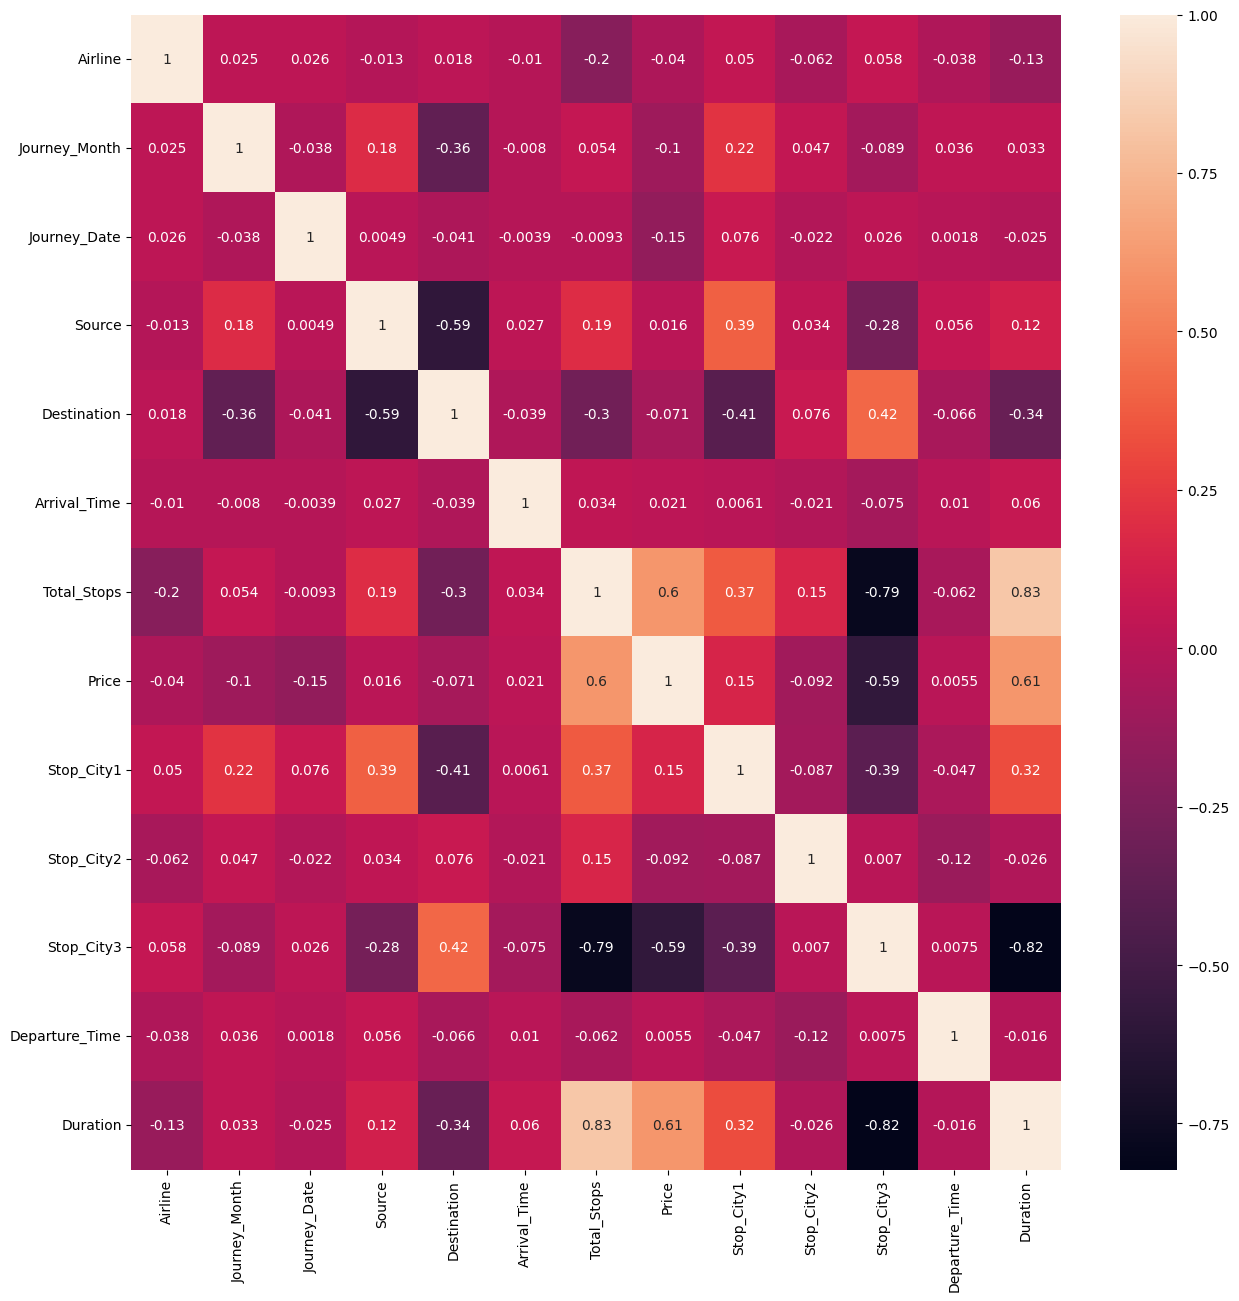

In [78]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)

- Here, Total_Stops, Travel_duration and Stop_City3 are having high correlation to each other. i.e., Multicollinearity.
- Hence Travel_hours is important to predict the price, we are going to drop Total_stops and Stop_City3.

In [79]:
# splitting the data as x and y
x_df = df.drop(['Price','Total_Stops', 'Stop_City3'], axis = 1)
y_df = df['Price']

In [80]:
x_df.head(4)

,Airline,Journey_Month,Journey_Date,Source,Destination,Arrival_Time,Stop_City1,Stop_City2,Departure_Time,Duration
0,3,3,24,0,5,70,0,11,1340,5.135798
1,1,5,1,3,0,795,2,21,350,6.098074
2,4,6,9,2,1,265,3,28,565,7.038784
3,3,5,12,3,0,1410,2,30,1085,5.783825


In [81]:
# splitting the data into trin test

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.3, random_state=42)

In [82]:
x_train.shape

(7478, 10)

<Axes: xlabel='Arrival_Time', ylabel='Count'>

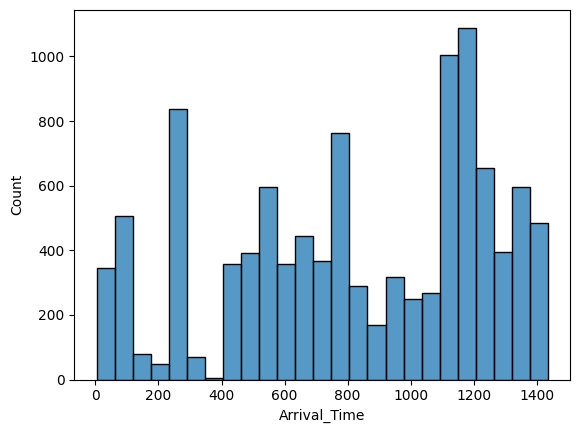

In [83]:
sns.histplot(df['Arrival_Time'])

## Scaling the data

Since the data is not normally distributed, which a Standard Scalar assumes, we are scaling using Min Max method.

In [84]:
scalar = MinMaxScaler()
X_train_scaled = scalar.fit_transform(x_train)

In [85]:
X_test_scaled = scalar.transform(x_test)

## Task 2:-Create a predictive model which will help the customers to predict future flight prices and plan their journey accordingly.

## Model Building

In [86]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
kn = KNeighborsRegressor()

In [87]:
for i in [lr, dt, kn]:
    i.fit(X_train_scaled, y_train)
    pred = i.predict(X_test_scaled)
    train_score = r2_score(y_train, i.predict(X_train_scaled))
    test_score = r2_score(pred, y_test)    
    adj_r2 = 1 - ((1-test_score)*(len(X_train_scaled)-1) / (len(X_train_scaled)-len(x_train.columns)-1))
    print(i)
    print("Train Score: \n R2 Score: ", train_score)
    print("Test Score: \n R2 Score: ", test_score)    
    print("Adjusted R2: ", adj_r2)
    print("MSE: ", mean_squared_error(pred, y_test))
    print()

LinearRegression()
Train Score: 
 R2 Score:  0.41383738656779623
Test Score: 
 R2 Score:  -0.20931749836753255
Adjusted R2:  -0.21093704771582167
MSE:  11214036.816427117

DecisionTreeRegressor()
Train Score: 
 R2 Score:  0.9741433632644257
Test Score: 
 R2 Score:  0.6704760826812423
Adjusted R2:  0.670034775707466
MSE:  6581970.940483619

KNeighborsRegressor()
Train Score: 
 R2 Score:  0.8151901119478375
Test Score: 
 R2 Score:  0.6239847961730547
Adjusted R2:  0.6234812268629878
MSE:  6056968.324405616



In [88]:
from sklearn.ensemble import GradientBoostingRegressor

In [89]:
gb = GradientBoostingRegressor()
rf = RandomForestRegressor()

In [90]:
for i in [rf, gb]:
    i.fit(X_train_scaled, y_train)
    pred = i.predict(X_test_scaled)
    test_score = r2_score(pred, y_test)
    train_score = r2_score(y_train, i.predict(X_train_scaled))
    adj_r2 = 1 - ((1-test_score)*(len(X_train_scaled)-1) / (len(X_train_scaled)-len(x_train.columns)-1))
    print(i)
    print("Train Score: R2 Score: ", train_score)
    print("Test Score: R2 Score: ", test_score)
    print("Adjusted R2 is ", adj_r2)
    print("MSE is ", mean_squared_error(pred, y_test))
    print()

RandomForestRegressor()
Train Score: R2 Score:  0.9563156004819643
Test Score: R2 Score:  0.7701595069207017
Adjusted R2 is  0.7698516985732002
MSE is  4034524.149388672

GradientBoostingRegressor()
Train Score: R2 Score:  0.7770136612516405
Test Score: R2 Score:  0.6746528343838549
Adjusted R2 is  0.6742171210242511
MSE is  4618393.51520813



In [91]:
pred_new = pd.Series(pred)

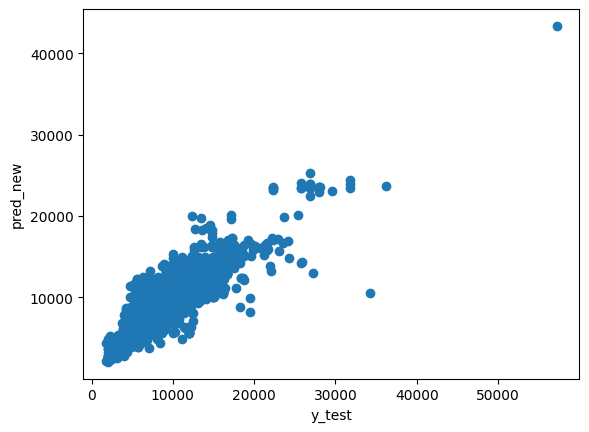

In [92]:
plt.scatter(y_test, pred_new)
plt.xlabel('y_test')
plt.ylabel('pred_new')
plt.show()

Since most of the model are overfitting except for the Gradient Boosting Regressor, we use Hold-out method or k-fold cross validation

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
list1 = [2, 3, 4, 5, 6, 7, 8, 9]

for num in list1:
    cv = cross_val_score(rf, x_df, y_df, cv=num)
    print(rf, num, cv.mean())


RandomForestRegressor() 2 0.7918952076561756
RandomForestRegressor() 3 0.7867345257342837
RandomForestRegressor() 4 0.7965652197626402
RandomForestRegressor() 5 0.8039543584236641
RandomForestRegressor() 6 0.8037646621756259
RandomForestRegressor() 7 0.8006113135270813
RandomForestRegressor() 8 0.8020069674036602
RandomForestRegressor() 9 0.8047153681218391


4 folds gives the best score as 80%, after that not much improvement.

In [95]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [96]:
result_ls = cross_val_score(lasso, X_train_scaled, y_train, cv = 4)

In [97]:
result_ls.mean()

0.4135714223059132

The model isn't doing well 

## Hyperparameter Tuning

we apply this GridSearchCV method for both GradientBoostingRegressor and RandomForestRegressor

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
param_grid = {'max_depth':[None, 1,2,3], 'max_samples': [50, 100, 150, 200],'min_samples_split':[2,4,10]}

gcv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv = 3)

In [100]:
result = gcv_rf.fit(X_train_scaled, y_train)

In [101]:
result.best_params_

{'max_depth': None, 'max_samples': 200, 'min_samples_split': 4}

In [102]:
param_grid_2 = {'learning_rate': [0.1, 0.03, 0.2], 'max_depth':[3, 4, 5], 'min_samples_split':[2,3,4],'n_estimators':[100,50,100]}

In [103]:
res = gcv_gb = GridSearchCV(gb, param_grid_2, cv=3)

In [104]:
res.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.03, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 50, 100]})

In [105]:
res.best_params_

{'learning_rate': 0.2,
 'max_depth': 5,
 'min_samples_split': 4,
 'n_estimators': 100}

Now that we have the best parameters for both Random Forest and Gradient Boosting Regressors, we can fit the model using these parameters

In [106]:
rf = RandomForestRegressor(max_samples=200, min_samples_split=4, max_depth=None, n_estimators = 100)

In [107]:
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_samples=200, min_samples_split=4)

In [108]:
y_predict_rf = rf.predict(X_test_scaled)

In [109]:
r2_score(y_predict_rf, y_test)

0.40947357642087334

In [110]:
gb = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100)

In [111]:
gb.fit(X_train_scaled, y_train)

GradientBoostingRegressor(max_depth=5)

In [112]:
y_predict_gb = gb.predict(X_test_scaled)

In [113]:
r2_score(y_predict_gb, y_test)

0.771892451937986

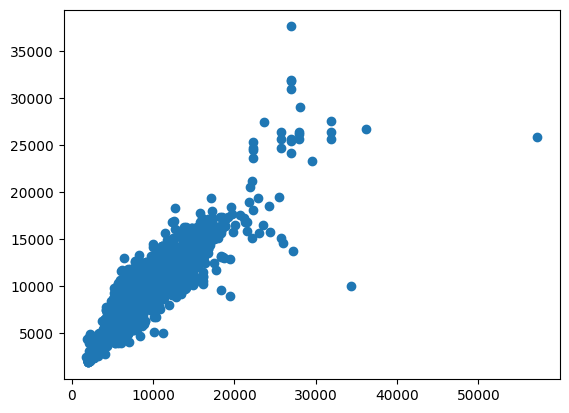

In [114]:
plt.scatter(y_test, pd.Series(y_predict_gb))
plt.show()

## Model Building - Using Neural Network

In [115]:
import tensorflow as tf

In [116]:
from tensorflow.keras import layers

In [117]:
num_features = x_train.columns
# print(len(num_features))
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer='l1', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation = 'relu', kernel_regularizer='l1'),
    layers.Dense(1, activation='linear')
])

In [118]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [119]:
model.fit(X_train_scaled, y_train, epochs=20, batch_size= 64, validation_split=0.2, verbose=2)

Epoch 1/20
94/94 - 3s - 31ms/step - loss: 105527408.0000 - val_loss: 101305664.0000
Epoch 2/20
94/94 - 0s - 3ms/step - loss: 103286480.0000 - val_loss: 96458984.0000
Epoch 3/20
94/94 - 0s - 3ms/step - loss: 94514624.0000 - val_loss: 83248000.0000
Epoch 4/20
94/94 - 0s - 4ms/step - loss: 77101280.0000 - val_loss: 62019112.0000
Epoch 5/20
94/94 - 0s - 3ms/step - loss: 54654608.0000 - val_loss: 39737940.0000
Epoch 6/20
94/94 - 0s - 3ms/step - loss: 35671860.0000 - val_loss: 25048360.0000
Epoch 7/20
94/94 - 0s - 4ms/step - loss: 26128208.0000 - val_loss: 19870524.0000
Epoch 8/20
94/94 - 0s - 3ms/step - loss: 23573268.0000 - val_loss: 18858598.0000
Epoch 9/20
94/94 - 0s - 3ms/step - loss: 23075302.0000 - val_loss: 18575286.0000
Epoch 10/20
94/94 - 0s - 3ms/step - loss: 22835640.0000 - val_loss: 18369852.0000
Epoch 11/20
94/94 - 0s - 4ms/step - loss: 22614360.0000 - val_loss: 18163470.0000
Epoch 12/20
94/94 - 0s - 4ms/step - loss: 22377154.0000 - val_loss: 17947198.0000
Epoch 13/20
94/94 - 0

In [120]:
y_hat = model.predict(X_test_scaled)

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [121]:
r2_score(y_hat, y_test)
# print(y_test)

-9.813068389892578

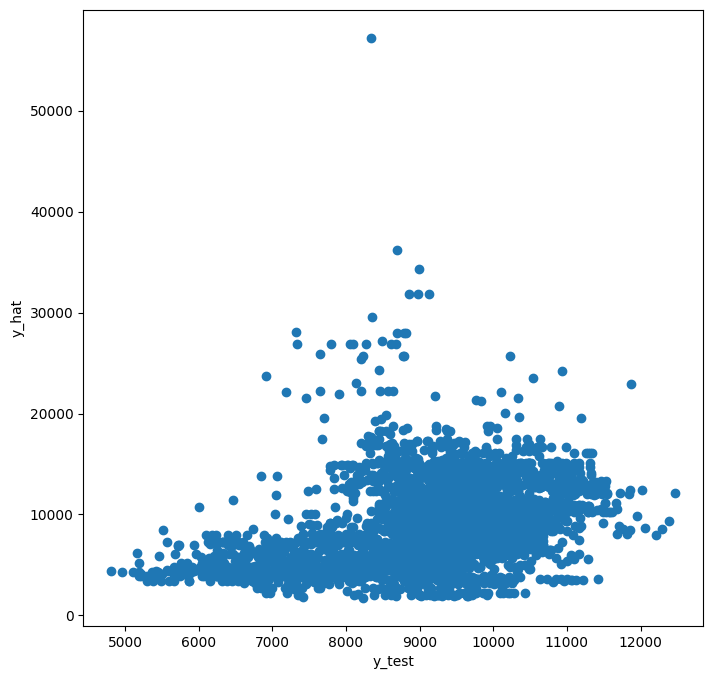

In [122]:
plt.figure(figsize=(8,8))
plt.scatter(y_hat, y_test)
plt.xlabel('y_test')
plt.ylabel('y_hat')
plt.show()

After using all the possible models, we come to conclusion that Gradient Boosting gives a promising result of 77% accuracy or Adj R2 value.

In [123]:
# checking the predictions with random input values

gb.predict([[3, 1, 25, 2, 5, 12, 1, 3, 2, 22]])

array([6264.18836378])

Creating a pickle file to Deploy the model.

In [124]:
import pickle
# open a file, where you ant to store the data
# file = open('flight_gradient.pkl', 'wb')

# # dump information to that file
# pickle.dump(gb, file)
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(gb) 
  
# Load the pickled model 
gb_from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
gb_from_pickle.predict(X_test_scaled) 

array([12138.36037803,  6684.713289  , 12499.35585791, ...,
        5658.56669701,  2941.53272943, 11794.32345777])

In [125]:
# open a file, where you ant to store the data
file = open('gradient_boosting_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(gb, file)

In [126]:
file.close()

## Saving model to csv file

In [127]:
from sklearn.ensemble import GradientBoostingRegressor
fit_GB = GradientBoostingRegressor().fit(X_train_scaled, y_train)

In [128]:
predictions = fit_GB.predict(X_test_scaled)

In [129]:
predictions_new = fit_GB.predict(x_test)

Mapping the predictions to the data

In [130]:
predictions = pd.Series(predictions)

In [131]:
X_test_scaled.shape

(3205, 10)

In [132]:
X_test_scaled_new = pd.DataFrame(X_test_scaled)

In [133]:
X_test_scaled_new.columns = x_df.columns

In [134]:
X_test_scaled_new['Prices_Predicted'] = predictions

In [135]:
X_test_scaled_new.sample(4)

,Airline,Journey_Month,Journey_Date,Source,Destination,Arrival_Time,Stop_City1,Stop_City2,Departure_Time,Duration,Prices_Predicted
3124,0.727273,0.333333,0.653846,0.00,0.4,0.000000,0.0,0.282051,0.883392,0.233608,4101.472594
2335,0.363636,1.000000,0.192308,0.75,0.0,0.681818,0.4,0.153846,0.342756,0.508912,12231.634254
1896,0.000000,1.000000,0.076923,0.75,0.0,0.538462,0.4,0.128205,0.424028,0.200148,4668.815917
2538,0.545455,0.000000,0.192308,0.50,0.2,0.877622,0.6,0.153846,0.286219,0.664445,14517.553759


In [136]:
X_test_scaled_new.to_csv('predictions.csv', index=False)